In [1]:
import os
from glob import glob

import numpy as np
import cv2

import tensorflow as tf
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_path = glob('./zucchini_dataset/*/*.jpg')

In [3]:
os.listdir('./zucchini_dataset')[1:]

['1S', '2S', 'S', 'O']

In [4]:
label_nums = os.listdir('./zucchini_dataset')[1:]

In [5]:
data_label = data_path.copy()

In [6]:
data_path[0].split('/')[2]

'1S'

In [7]:
for i in range(len(data_label)):
    data_label[i] = data_path[i].split('/')[2]

In [8]:
data_label[:-1:300]

['1S', '1S', '1S', '1S', '2S', '2S', 'S', 'S', 'S', 'O', 'O', 'O']

In [9]:
# set을 통한 중복 제거
class_names = list(set(data_label))

In [10]:
class_names

['2S', '1S', 'S', 'O']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data_path, data_label, test_size = 0.2, random_state = 123)

In [13]:
import tqdm

In [14]:
for i in tqdm.trange(len(X_train)):
    image = Image.open(X_train[i])
    image = image.resize((256,256))
    X_train[i] = np.array(image, dtype='float32')

100%|██████████| 2677/2677 [05:43<00:00,  7.78it/s]


In [15]:
for i in tqdm.trange(len(X_test)):
    image = Image.open(X_test[i])
    image = image.resize((256,256))
    X_test[i] = np.array(image, dtype='float32')

100%|██████████| 670/670 [01:26<00:00,  7.76it/s]


In [16]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [17]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [18]:
X_train.dtype

dtype('float32')

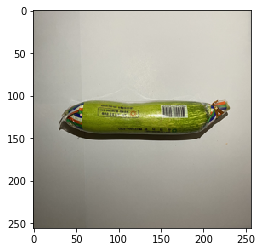

In [19]:
plt.imshow(X_train[10])

In [20]:
for i in tqdm.trange(len(y_train)):
    for j in range(len(class_names)):
        if y_train[i] == class_names[j]:
            y_train[i] = int(j)

100%|██████████| 2677/2677 [00:00<00:00, 324175.77it/s]


In [21]:
for i in tqdm.trange(len(y_test)):
    for j in range(len(class_names)):
        if y_test[i] == class_names[j]:
            y_test[i] = int(j)

100%|██████████| 670/670 [00:00<00:00, 262756.77it/s]


In [29]:
import os
from glob import glob
from datetime import datetime

import numpy as np

import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow.keras import layers

from tensorflow.keras import datasets 

import matplotlib.pyplot as plt

%matplotlib inline

Instructions for updating:
non-resource variables are not supported in the long term


In [30]:
num_epochs = 20
batch_size = 150

learning_rate = 0.001

dropout_rate = 0.5

input_shape = (256, 256, 3)
num_classes = 4

In [31]:
inputs = layers.Input(input_shape)

net = layers.Conv2D(32, (3, 3), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(dropout_rate)(net)

net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(dropout_rate)(net)

net = layers.Conv2D(128, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(128, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(dropout_rate)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(dropout_rate)(net)
net = layers.Dense(num_classes)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [32]:
# Model is the full model w/o custom layers
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),  # Optimization
              loss='sparse_categorical_crossentropy',  # Loss Function 
              metrics=['accuracy'])  # Metrics / Accuracy

In [33]:
class_names = np.unique(data_label)

In [34]:
history = model.fit(
    X_train, 
    y_train,
    batch_size = batch_size,
    validation_split = 0.2,
    shuffle = True,
    epochs = 20
)

Train on 2141 samples, validate on 536 samples
Epoch 1/20
2141/2141 [==============================] - 368s 172ms/sample - loss: 3.7973 - acc: 0.2499 - val_loss: 1.3701 - val_acc: 0.3022
Epoch 2/20
2141/2141 [==============================] - 335s 157ms/sample - loss: 1.3722 - acc: 0.3017 - val_loss: 1.3665 - val_acc: 0.3022
Epoch 3/20
2141/2141 [==============================] - 338s 158ms/sample - loss: 1.3742 - acc: 0.2919 - val_loss: 1.3724 - val_acc: 0.3022
Epoch 4/20
2141/2141 [==============================] - 326s 152ms/sample - loss: 1.3715 - acc: 0.3064 - val_loss: 1.3658 - val_acc: 0.3022
Epoch 5/20
2141/2141 [==============================] - 332s 155ms/sample - loss: 1.3729 - acc: 0.3101 - val_loss: 1.3700 - val_acc: 0.2966
Epoch 6/20
2141/2141 [==============================] - 333s 156ms/sample - loss: 1.3751 - acc: 0.2901 - val_loss: 1.3684 - val_acc: 0.3022
Epoch 7/20
2141/2141 [==============================] - 317s 148ms/sample - loss: 1.3746 - acc: 0.2910 - val_loss

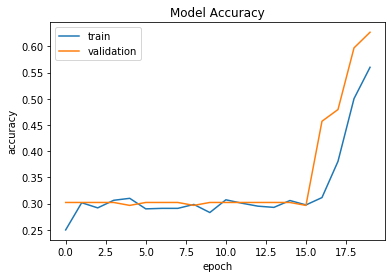

In [35]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Model Accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

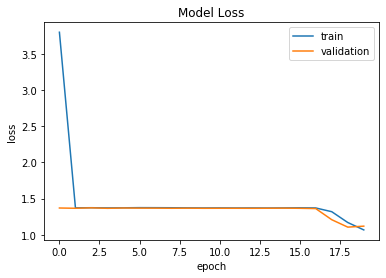

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [37]:
y_pred = model.predict(X_test)

In [38]:
y_pred1 = y_pred.copy()

In [39]:
for i in range(len(y_pred1)):
    y_pred1[i] = np.argmax(y_pred[i])

In [40]:
cor = 0
for i in range(len(y_pred1)):
    if np.argmax(y_pred[i]) - np.float32(y_test[i]) == 0:
        cor += 1
print('score :',cor / len(y_pred1) * 100)

score : 58.95522388059702
